In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

# Load The Data

In [2]:
x_train = pd.read_csv('Diabetes_XTrain.csv')
y_train = pd.read_csv('Diabetes_YTrain.csv')
x_test = pd.read_csv('Diabetes_Xtest.csv')

In [3]:
print(x_train.shape , y_train.shape)
print(x_test.shape)

(576, 8) (576, 1)
(192, 8)


In [4]:
x_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
5,7,100,0,0,0,30.0,0.484,32
6,4,110,66,0,0,31.9,0.471,29
7,1,111,86,19,0,30.1,0.143,23
8,3,169,74,19,125,29.9,0.268,31
9,1,71,62,0,0,21.8,0.416,26


In [5]:
y_train.head(10)

,Outcome
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,0


In [6]:
features = x_train.columns
print(features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


In [8]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [9]:
corr = x_train.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.175781,0.159623,-0.089059,-0.059903,0.043933,-0.036454,0.555994
Glucose,0.175781,1.000000,0.151899,0.035213,0.332527,0.213883,0.151490,0.261131
BloodPressure,0.159623,0.151899,1.000000,0.235094,0.102192,0.272952,0.031765,0.254055
SkinThickness,-0.089059,0.035213,0.235094,1.000000,0.456451,0.403305,0.179001,-0.115892
Insulin,-0.059903,0.332527,0.102192,0.456451,1.000000,0.183658,0.222323,-0.049814
BMI,0.043933,0.213883,0.272952,0.403305,0.183658,1.000000,0.143271,0.051957
DiabetesPedigreeFunction,-0.036454,0.151490,0.031765,0.179001,0.222323,0.143271,1.000000,0.034847
Age,0.555994,0.261131,0.254055,-0.115892,-0.049814,0.051957,0.034847,1.000000


<AxesSubplot:>

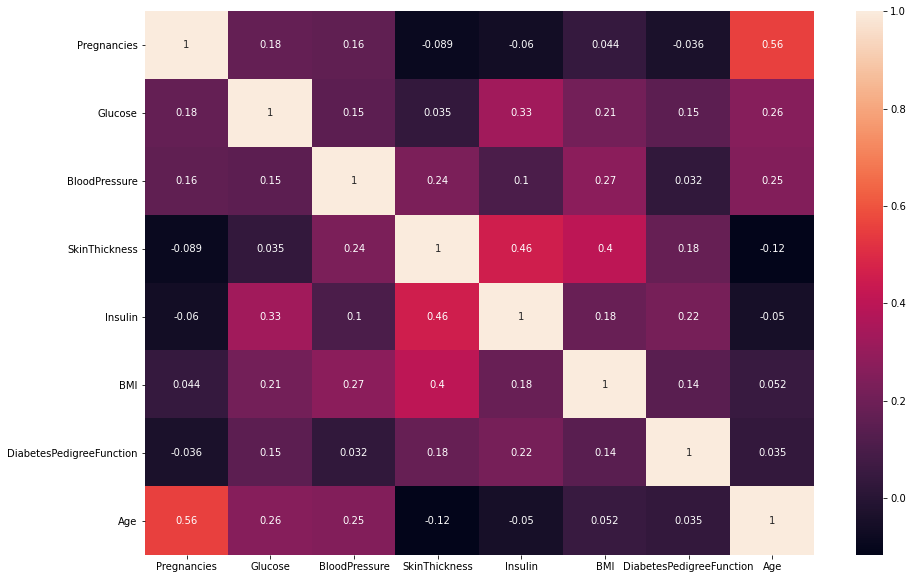

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot= True)

## We cam see in heatmap that every feature in not much correlated with each other, so there is no need to feature selectin using pearson correlation plus every feature is distinct so there is also no need to do variance threshold

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

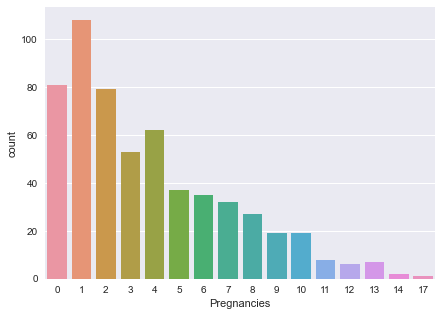

In [11]:
plt.figure(figsize = (7,5))
plt.style.use('seaborn')
sns.countplot(x = 'Pregnancies' , data = x_train )

<AxesSubplot:xlabel='Age', ylabel='Count'>

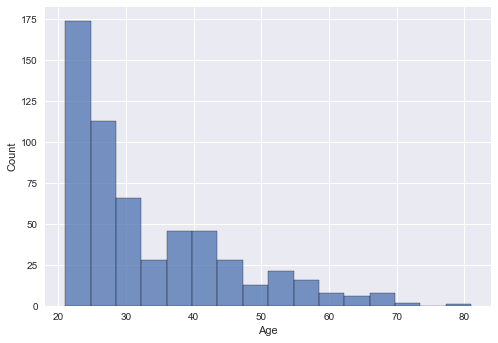

In [12]:
sns.histplot(data=x_train, x="Age" )

# Normalisation of the Data

In [13]:
x_train_mean = np.mean(x_train , axis = 0)
x_train_std = np.std(x_train , axis = 0)
x_test_mean = np.mean(x_test , axis = 0)
x_test_std = np.std(x_test , axis = 0)

In [14]:
x_train = (x_train - x_train_mean) / x_train_std

In [15]:
x_test = (x_test - x_test_mean) / x_test_std

# Using KNN algorith for classification of Diabetes

In [16]:
def dist(x1 , x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [17]:
def knn(x ,y , query , k = 10):
    val = []
    m = x.shape[0]
    for i in range(m):
        d = dist(query , x.values[i])
        val.append((d , y.values[i]))
    val = sorted(val)
    val = val[:k]
    val = np.array(val)
    freq = np.unique(val[:, 1] , return_counts=True)
    index = freq[1].argmax()
    pred = freq[0][index]
    return pred

In [18]:
def prediction(x_train , y_train , x_test):
    y_predict = []
    for i in range(len(x_test)):
        pred = knn(x_train , y_train , x_test.values[i] )
        y_predict.append(pred[0])
    return y_predict

In [19]:
def accuracy(x_train , y_train , x_test ):
    y_pred = prediction(x_train , y_train , x_train)
    y_pred = np.array(y_pred).reshape(-1,1)
    
    
    y_train = np.array(y_train).reshape(-1, 1)
    accu = np.mean(y_train == y_pred)
    return accu

In [20]:
accuracy(x_train , y_train , x_test )

<ipython-input-17-153c1049ac08>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  val = np.array(val)


0.7673611111111112

# Using sklearn Library

In [21]:
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# y_train.reshape(576, )
# x_test = np.array(x_test)


In [22]:
new_knn = KNeighborsClassifier(n_neighbors=1)
new_knn.fit(x_train , y_train.values.ravel())
y_predi = new_knn.predict(x_test)

In [23]:
y_predi

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [24]:
y_pred = prediction(x_train , y_train , x_test)

<ipython-input-17-153c1049ac08>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  val = np.array(val)
